In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import cluster
%matplotlib inline

from Mixture import KMeans

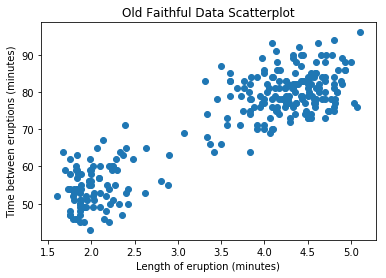

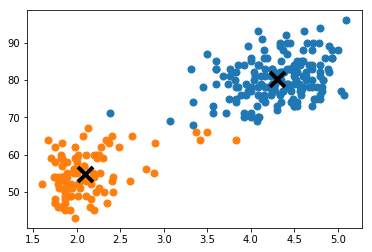

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/ming-zhao/Intro-to-Deep-Learning/master/Data/faithful.csv")
data.columns = ['eruptions', 'waiting']

plt.scatter(data.eruptions, data.waiting)
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')
plt.show()

X = data.values
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in np.unique(labels):
    ds = X[np.where(labels==i)] # select only data observations with cluster label == i
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7) # plot the data observations
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')  # plot the centroids
    plt.setp(lines,ms=15.0) # make the centroid x's bigger
    plt.setp(lines,mew=4.0)
plt.show()

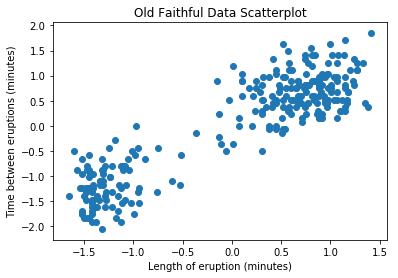

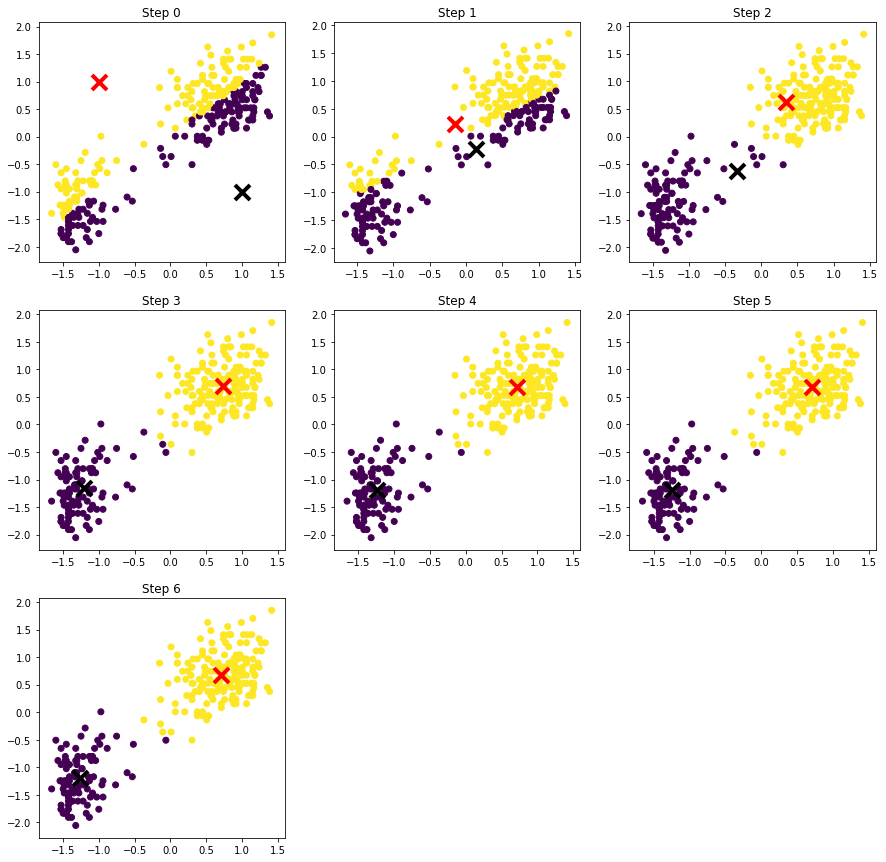

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/ming-zhao/Intro-to-Deep-Learning/master/Data/faithful.csv")
# faithful.columns = ['eruptions', 'waiting']
X = data.values
X = (X-np.mean(X, axis=0)) / np.sqrt(np.var(X, axis=0)) # standardizing data

plt.scatter(X[:,0], X[:,1])
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')
plt.show()

iter_max = 9
centers = np.array([[1,-1], [-1,1]])

plt.figure(figsize=(15, 15))
for s in range(iter_max):
    plt.subplot(iter_max//3,3,s+1)
    prev_centers = np.copy(centers)
    D = cdist(X, centers)
    cluster_index = np.argmin(D, axis=1)
    
    for i in range(2):
        lines = plt.plot(centers[i,0],centers[i,1],'kx', c=(1*i, 0, 0))
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=4.0)
    plt.scatter(X[:,0], X[:,1], c=cluster_index)
    
    cluster_index = np.eye(2)[cluster_index]
    centers = np.sum(X[:, None, :] * cluster_index[:, :, None], axis=0) / np.sum(cluster_index, axis=0)[:, None]
    plt.title('Step {}'.format(s))
    if np.allclose(prev_centers, centers):
        break
plt.show()

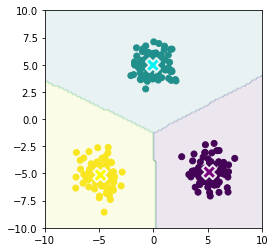

In [4]:
np.random.seed(1234)
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
x_train = np.vstack((x1, x2, x3))

x0, x1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
x = np.array([x0, x1]).reshape(2, -1).T

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
cluster = kmeans.predict(x_train)
plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], s=200, marker='X', lw=2, 
            c=['purple', 'cyan', 'yellow'], edgecolor="white")
plt.contourf(x0, x1, kmeans.predict(x).reshape(100, 100), alpha=0.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()